<a href="https://colab.research.google.com/github/deepthi-sud/PythonDataVisualizaton/blob/main/Visualization_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [32]:
#reading CSV, checking nulls, shape, columns and info

#link to dataset: https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset/

path = "diabetes.csv"
df = pd.read_csv(path)
df.head()
df.isnull().sum()
df.columns
df.describe()
df.corr()
df.info()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [33]:
df.shape #data set size

(768, 9)

In [ ]:
#initializing variables

mean_glucose_per_age = df[["Glucose", "Age"]].groupby(as_index=False, by = "Age").mean()
mean_glucose_per_age

X= mean_glucose_per_age["Age"]
Y = mean_glucose_per_age["Glucose"]
plot_title = "Average Glucose Level vs Age"
x_label = "Age"
y_label = "Average Glucose"


Text(0, 0.5, 'Average Glucose')

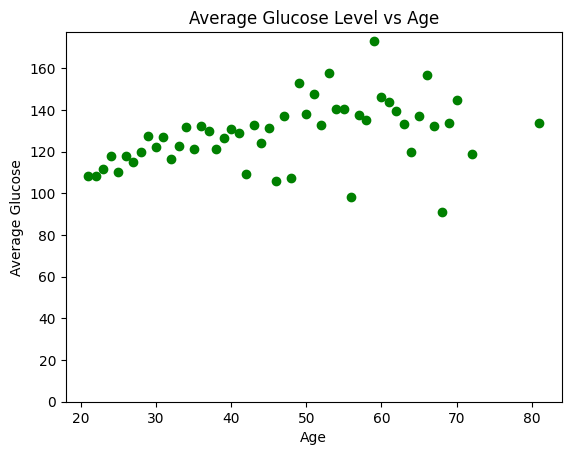

In [ ]:
#MATPLOTLIB

ax = plt.scatter(X, Y, color="green", marker="o")
plt.ylim(0,)
plt.title(plot_title)
plt.xlabel(x_label)
plt.ylabel(y_label)


[Text(0.5, 1.0, 'Average Glucose Level vs Age'),
 Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Average Glucose'),
 (0.0, 180.0)]

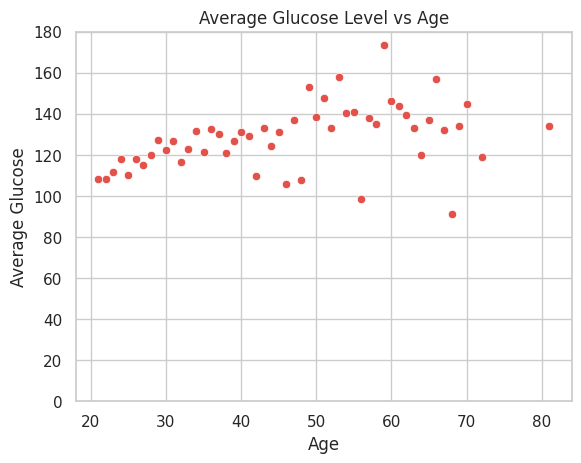

In [ ]:
#SEABORN

sns.set_theme(style="whitegrid", palette="Spectral")
seaborn_plot = sns.scatterplot(x = X, y = Y)
seaborn_plot.set(title = plot_title, xlabel= x_label, ylabel=y_label, ylim=(0,180))



In [ ]:
#PLOTLY

fig = px.scatter(mean_glucose_per_age, x="Age", y="Glucose", title = plot_title, labels={"Age":x_label, "Glucose":y_label}, color='Age')
fig.update_layout(plot_bgcolor="lightgray")
fig.update_yaxes(range=[0, 180], row=1, col=1)
fig.show()

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
bins=np.linspace(df['Age'].min(),df['Age'].max(),5)

In [ ]:
bins

array([21., 36., 51., 66., 81.])

In [ ]:
labels=['21-35','36-50','51-65','66-81']
df['Age-bins']=pd.cut(df['Age'],bins,labels=labels,include_lowest=True)

In [ ]:
df[['Age','Age-bins','Outcome']]

,Age,Age-bins,Outcome
0,50,36-50,1
1,31,21-35,0
2,32,21-35,1
3,21,21-35,0
4,33,21-35,1
...,...,...,...
763,63,51-65,0
764,27,21-35,0
765,30,21-35,0
766,47,36-50,1


In [ ]:
df_dia=df[df['Outcome']==1]


In [ ]:
!pip install pywaffle

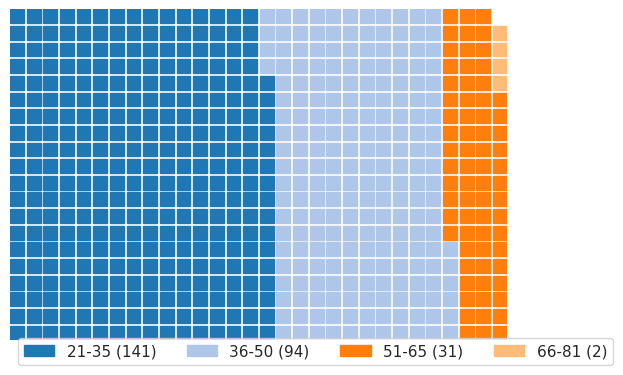

In [ ]:
df_dia1=df_dia.groupby(by=['Age-bins']).count() #number of patients with diabetes for different age categories

# import Waffle from pywaffle
from pywaffle import Waffle

#Set up the Waffle chart figure

fig = plt.figure(FigureClass = Waffle,
                 rows = 20, columns = 30, #pass the number of rows and columns for the waffle
                 values = df_dia1['Outcome'], #pass the data to be used for display
                 cmap_name = 'tab20', #color scheme
                 legend = {'labels': [f"{k} ({v})" for k, v in zip(df_dia1.index.values,df_dia1['Outcome'])],
                            'loc': 'lower left', 'bbox_to_anchor':(0,-0.1),'ncol': 4}
                 #notice the use of list comprehension for creating labels
                 #from index and total of the dataset
                )

#Display the waffle chart
plt.show()

<Axes: xlabel='BMI', ylabel='Glucose'>

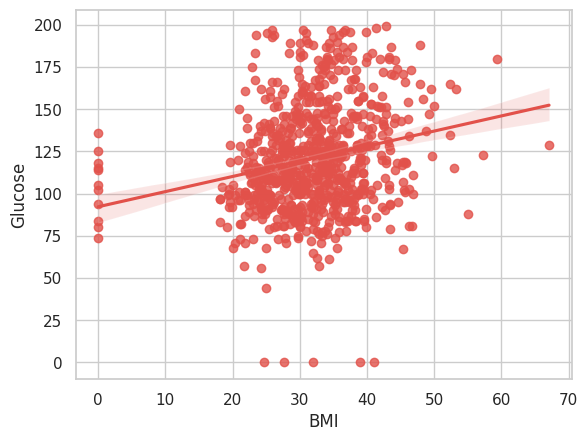

In [ ]:
sns.regplot(x="BMI",y="Glucose",data=df)

In [ ]:
df[df['BMI']==0]

In [ ]:
df=df[df['Glucose']!=0 ]

In [ ]:
df=df[df['BMI']!=0 ]

In [ ]:
df[df['Glucose']==0]

<Axes: xlabel='Glucose', ylabel='Insulin'>

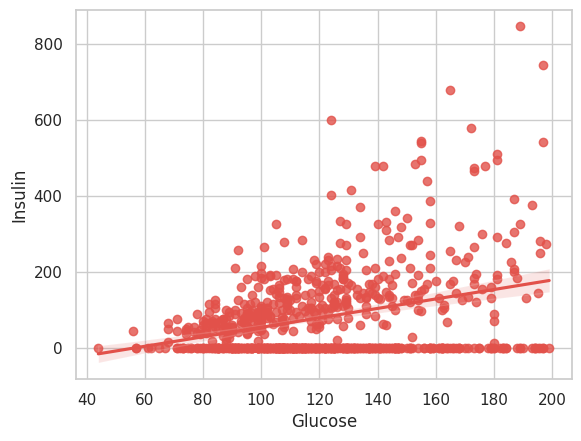

In [ ]:
sns.regplot(x="Glucose",y="Insulin",data=df)

<Axes: xlabel='BMI', ylabel='Glucose'>

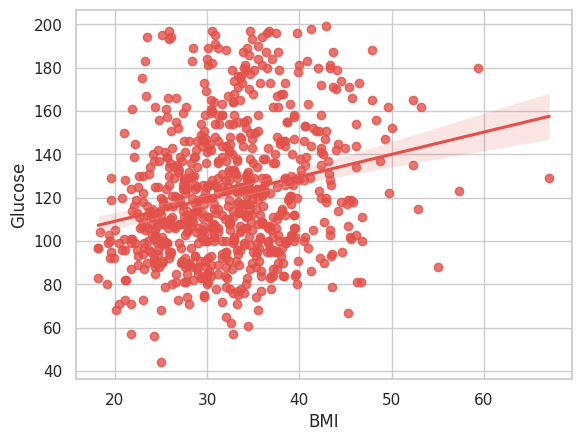

In [ ]:
sns.regplot(x="BMI",y="Glucose",data=df)

<Axes: xlabel='BloodPressure', ylabel='Glucose'>

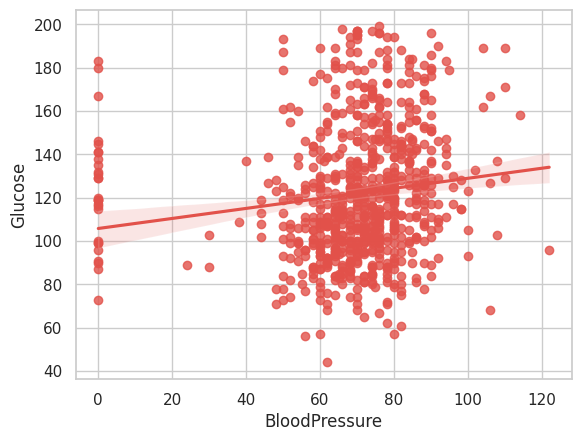

In [ ]:
sns.regplot(x="BloodPressure",y="Glucose",data=df)

In [ ]:
df=df[df['BloodPressure']!=0]

<Axes: xlabel='BloodPressure', ylabel='Glucose'>

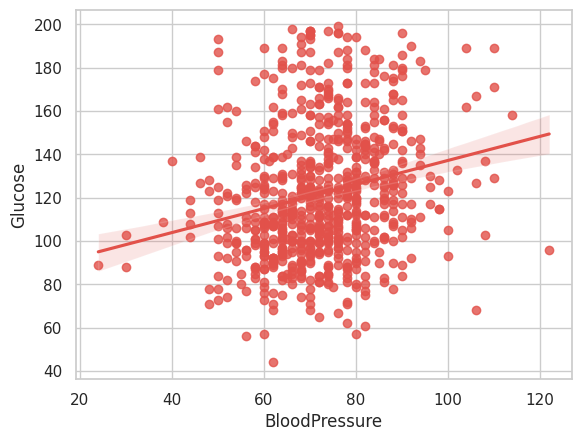

In [ ]:
sns.regplot(x="BloodPressure",y="Glucose",data=df)

<Axes: xlabel='Outcome', ylabel='Glucose'>

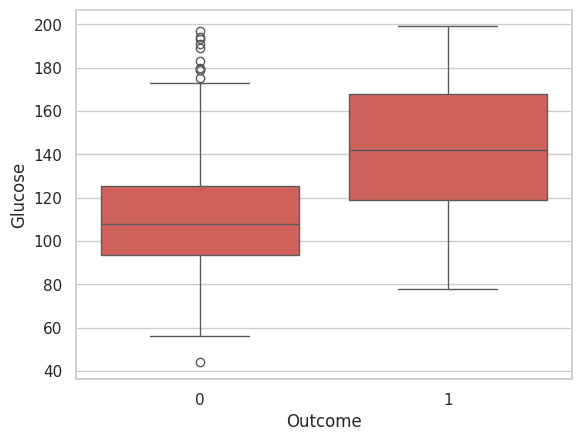

In [ ]:
sns.boxplot(x="Outcome",y="Glucose",data=df)

<Axes: xlabel='Outcome', ylabel='BMI'>

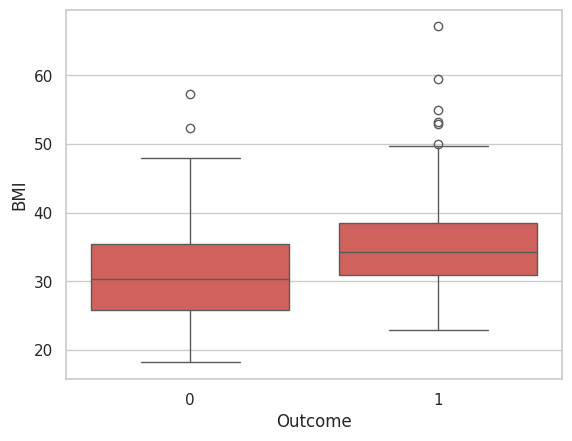

In [ ]:
sns.boxplot(x="Outcome",y="BMI",data=df)

In [ ]:
!pip install pyngrok

In [ ]:
from pyngrok import ngrok
ngrok.kill()
NGROK_AUTH_TOKEN = "2Irwzpl15ewCiLLfkoTaiQN0YS3_mfT7Grs29VK5VZ1j14N4"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)
ngrok.connect(8050)

<NgrokTunnel: "https://c496-35-231-114-34.ngrok-free.app" -> "http://localhost:8050">

In [ ]:
!pip install dash
!pip install plotly

In [ ]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

# Create a Dash application and give it a meaningful title
app = dash.Dash(__name__)
app.layout = html.Div(children=[
    html.Div([
        html.H1('Diabetes Dashboard', style={'textAlign': 'center', 'color': '#503D36', 'font-size': 24}),

        # Plot 1: Average Glucose Level vs Age
        dcc.Graph(
            id='glucose_vs_age',
            figure=px.scatter(
                mean_glucose_per_age,
                x="Age",
                y="Glucose",
                labels={"Age": "Age", "Glucose": "Glucose (mg/dL)"},
                title="Average Glucose Level vs Age"
            )
        )]),
    html.Div([

        #Plot 2: Glucose Levels vs Blood Pressure
        dcc.Graph(
            id="glucose_vs_blood_pressure",
            figure=px.scatter(
                df,
                x="BloodPressure",
                y="Glucose",
                labels={"BloodPressure": "Blood Pressure (mm Hg)", "Glucose": "Glucose (mg/dL)"},
                trendline="ols",  # Ordinary Least Squares regression line -- used instead of sns.regplot because dash expects 2 plotly graphs. did not work with seaborn's regplot
                title="Glucose vs Blood Pressure"
            )
        )])
])

if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>